In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/animal-images/dataset/lamb/lamb (62).jpg
/kaggle/input/animal-images/dataset/lamb/lamb (70).jpg
/kaggle/input/animal-images/dataset/lamb/lamb (82).jpg
/kaggle/input/animal-images/dataset/lamb/lamb (23).jpg
/kaggle/input/animal-images/dataset/lamb/lamb (3).jpg
/kaggle/input/animal-images/dataset/lamb/lamb (106).jpg
/kaggle/input/animal-images/dataset/lamb/lamb (41).jpg
/kaggle/input/animal-images/dataset/lamb/lamb (55).jpg
/kaggle/input/animal-images/dataset/lamb/lamb (61).jpg
/kaggle/input/animal-images/dataset/lamb/lamb (87).jpg
/kaggle/input/animal-images/dataset/lamb/lamb (86).jpg
/kaggle/input/animal-images/dataset/lamb/lamb (51).jpg
/kaggle/input/animal-images/dataset/lamb/lamb (59).jpg
/kaggle/input/animal-images/dataset/lamb/lamb (24).jpg
/kaggle/input/animal-images/dataset/lamb/lamb (4).jpg
/kaggle/input/animal-images/dataset/lamb/lamb (18).jpg
/kaggle/input/animal-images/dataset/lamb/lamb (12).jpg
/kaggle/input/animal-images/dataset/lamb/lamb (68).jpg
/kaggle/inp

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [3]:
# Set the correct path to your image folders
data_dir = '/kaggle/input/animal-images/dataset'
categories = ['cat', 'cow', 'dog', 'lamb', 'zebra']
image_size = 64  # You can try 128 later if needed

X = []
y = []

for category in categories:
    folder_path = os.path.join(data_dir, category)
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (image_size, image_size))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            X.append(img.flatten())  # Flatten image to 1D vector
            y.append(category)
        except Exception as e:
            print(f"Error processing {img_path}: {e}")


In [4]:
X = np.array(X)
y = np.array(y)

# Convert labels to numbers (e.g., 'dog' -> 0)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


In [5]:
from sklearn.metrics import accuracy_score

for k in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"k={k} --> Accuracy: {acc:.2f}")


k=1 --> Accuracy: 0.30
k=2 --> Accuracy: 0.35
k=3 --> Accuracy: 0.36
k=4 --> Accuracy: 0.35
k=5 --> Accuracy: 0.36
k=6 --> Accuracy: 0.36
k=7 --> Accuracy: 0.35
k=8 --> Accuracy: 0.36
k=9 --> Accuracy: 0.30


In [6]:
# Use the best k for final model
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {acc * 100:.2f}%")

print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))


✅ Accuracy: 36.45%

📊 Classification Report:

              precision    recall  f1-score   support

         cat       0.38      0.27      0.32        22
         cow       0.50      0.25      0.33        20
         dog       0.34      0.52      0.42        21
        lamb       0.35      0.77      0.49        22
       zebra       0.00      0.00      0.00        22

    accuracy                           0.36       107
   macro avg       0.31      0.36      0.31       107
weighted avg       0.31      0.36      0.31       107



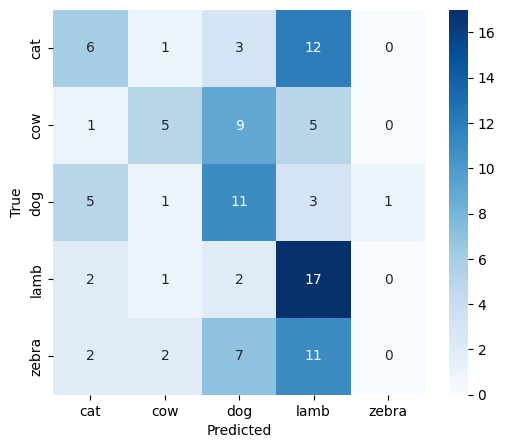

In [7]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


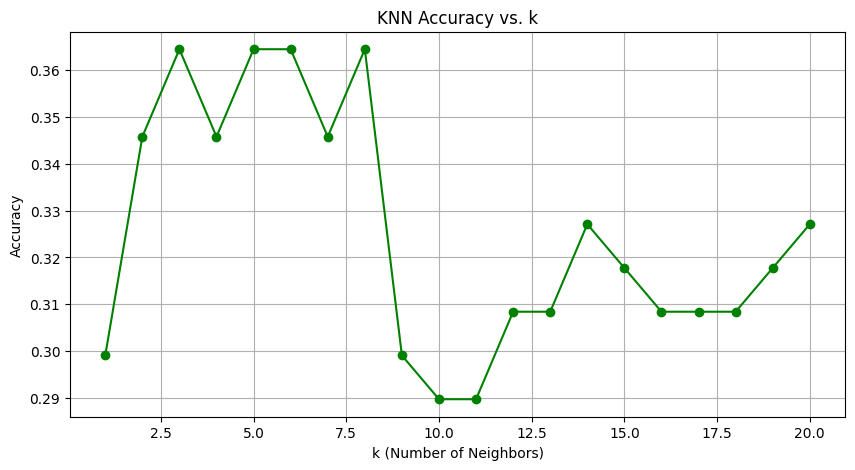

In [8]:
accuracies = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)         # use original X_train, no PCA
    y_pred = knn.predict(X_test)      # use original X_test, no PCA
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), accuracies, marker='o', color='green')
plt.title('KNN Accuracy vs. k')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
